<a href="https://colab.research.google.com/github/Hermina-dev/Mini-Projet-2/blob/main/Miniprojet_2_Nyaleu_Ngassa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
uploaded = files.upload()


Saving Dataset_Reponse_Marketing.csv to Dataset_Reponse_Marketing (1).csv


I- EXPLORATION DU DATA SET

In [ ]:
df = pd.read_csv("Dataset_Reponse_Marketing.csv")
print(df.head())
print(df.shape)
print(df.dtypes)
print(df.describe())



   Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22  Homme          40124             16.518974                9   
1   32  Femme          26307             21.973535                8   
2   28  Femme          30040             26.762915                9   
3   16  Femme          15843             29.046008                9   
4   45  Homme          20225             21.479944                5   

   Reponse_campagne  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0  
(2400, 6)
Age                       int64
Sexe                     object
Revenu_annuel             int64
Temps_passe_sur_site    float64
Achats_en_ligne           int64
Reponse_campagne          int64
dtype: object
               Age  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
count  2400.000000    2400.000000           2400.000000      2400.000000   
mean     34.611250   26197.005000             22.073762         7.642083 

In [ ]:
df[["Reponse_campagne",]].value_counts()

Reponse_campagne  Sexe 
1                 Femme    643
                  Homme    620
0                 Femme    595
                  Homme    542
Name: count, dtype: int64

In [ ]:
# Vérification des valeurs manquantes
print("🔎 Valeurs manquantes par colonne :")
print(df.isnull().sum())


🔎 Valeurs manquantes par colonne :
Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


<ipython-input-20-445fff1c7106>:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


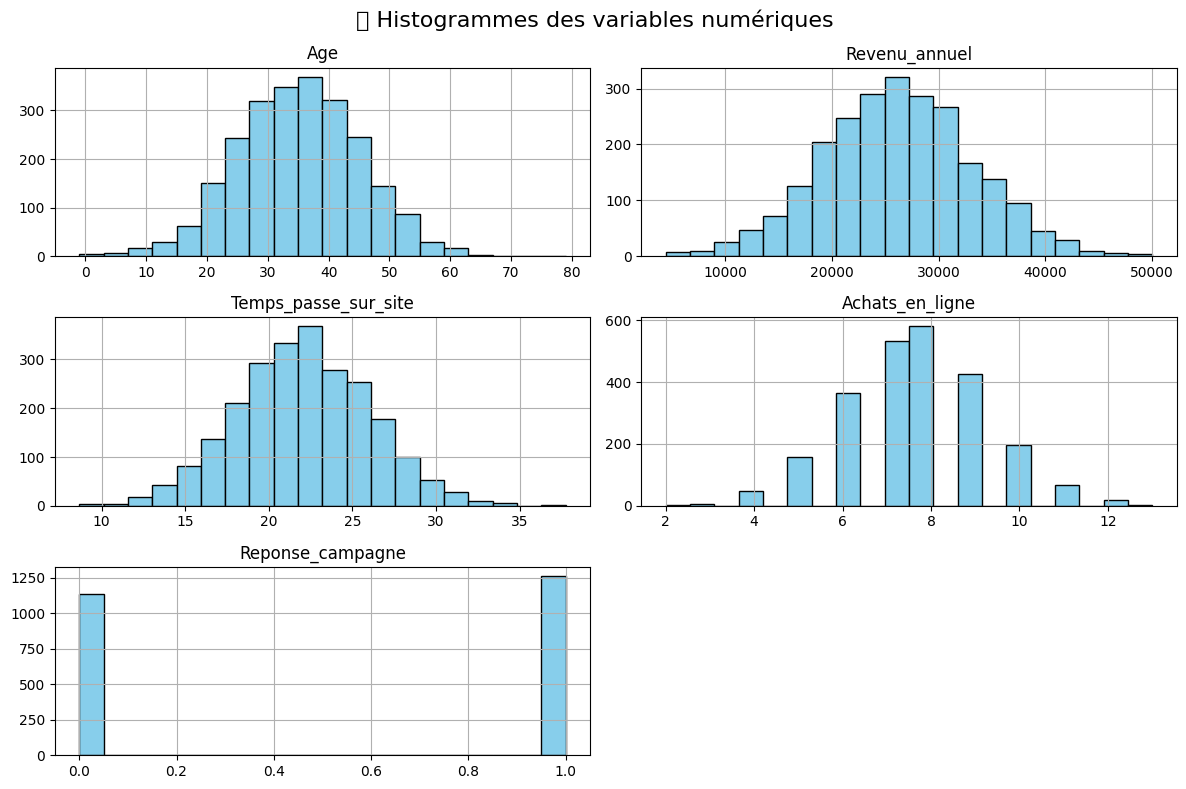

In [ ]:
#histogramme
df.hist(bins=20, figsize=(12, 8), edgecolor='black', color='skyblue')
plt.suptitle("📊 Histogrammes des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

**Âge**
La distribution suit une forme légèrement asymétrique, avec une majorité de clients âgés de 30 à 45 ans.
La densité chute nettement après 55 ans.

**Revenu annuel**
Le revenu moyen des clients se situe autour de 27 000 €, avec une répartition en cloche relativement symétrique.
Des valeurs extrêmes (jusqu’à 50 000 €) sont présentes, mais peu fréquentes.

 **Temps passé sur le site**
Très concentré entre 18 et 26 minutes, avec un pic autour de 22-23 minutes.

**Achats en ligne**
La majorité des clients effectuent entre 6 et 9 achats, avec un pic net à 7-8.
Très peu de clients ont moins de 4 ou plus de 10 achats.

En conclusion les données montrent des profils relativement homogènes, centrés autour d’adultes actifs ayant un revenu moyen et un comportement d’achat assez stable.

In [ ]:
# 1. Encodage de la variable 'Sexe' (Homme = 1, Femme = 0)
label_encoder = LabelEncoder()
df["Sexe"] = label_encoder.fit_transform(df["Sexe"])

# 2. Séparation des variables explicatives et de la cible
X = df.drop("Reponse_campagne", axis=1)
y = df["Reponse_campagne"]

# 3. Standardisation des variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


MATRICE DE CORREALTION

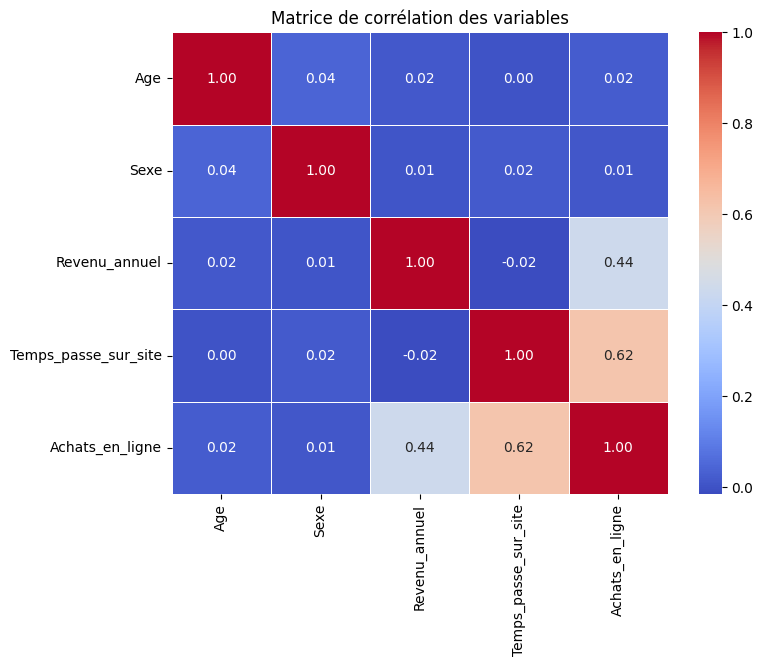

In [ ]:
#matrice de correlation

df_corr = pd.DataFrame(X_scaled, columns=X.columns)
correlation_matrix = df_corr.corr()

#graphique
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()


Pas besoin de normaliser les données car elles sont assez homogènes, mais on observe que les données sont très peu correlées entre elles avec des coef pour la plupart proches de 0, en dehors des variables du revenu annuel et des achats en ligne (0,44), des acha**ts en ligne et du temps passé sur le site (0,62), plus l'on passe de temps en ligne, plus les achats sont élevés**

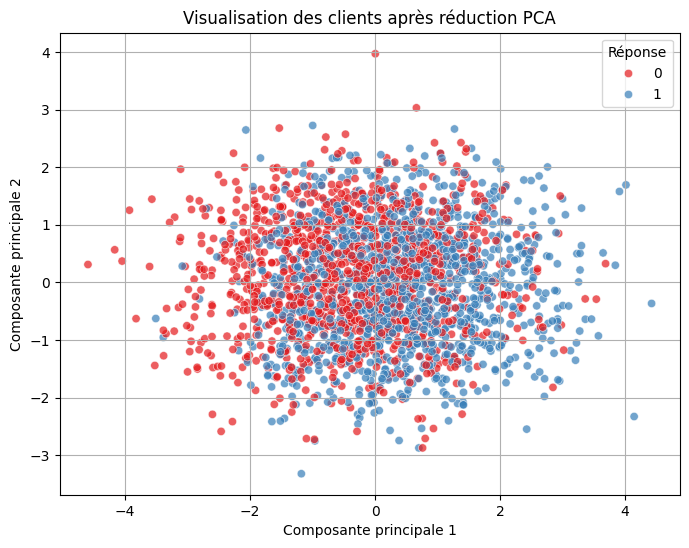

In [ ]:
# Appliquer la PCA (2 composantes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame pour visualiser
pca_df = pd.DataFrame(data=X_pca, columns=["PCA1", "PCA2"])
pca_df["Reponse_campagne"] = y.values

# Affichage du nuage de points
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Reponse_campagne", palette="Set1", alpha=0.7)
plt.title("Visualisation des clients après réduction PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Réponse")
plt.grid(True)
plt.show()

on remarque que la distribution est assez homogène, il n'ya pas de sépartion aire entre les 2 nuages de points, on peut conclure qu'il n'ya pas de profil client facilement identifiable visuellement parlant car le nuage est homogène.

II- MODELISATIONS

KNN

In [ ]:
def get_optimal_k_value(normalized_problem, solution):
    n_folds = 5
    parameters = {"n_neighbors": np.arange(1, 52, 2)}
    grid_search_object = GridSearchCV(
        KNeighborsClassifier(),
        parameters,
        cv=n_folds,
        scoring="f1_macro"
    )

    grid_search_object.fit(normalized_problem, solution)
    print("Meilleur k :", grid_search_object.best_params_)

    best_model = grid_search_object.best_estimator_
    scores = pd.DataFrame(grid_search_object.cv_results_)

    return best_model, grid_search_object.best_params_, scores

In [ ]:
best_model, best_params, scores = get_optimal_k_value(X_scaled, y)
print(best_model)
print(best_params)


Meilleur k : {'n_neighbors': np.int64(49)}
KNeighborsClassifier(n_neighbors=np.int64(49))
{'n_neighbors': np.int64(49)}


Le modèle KNN donne de meilleurs résultats lorsqu’il prend en compte 49 clients les plus proches pour prédire la réponse à une campagne.
Cela signifie qu’un client sera classé comme "répondeur" s’il ressemble à une majorité de 49 clients similaires ayant répondu.

REGRESSION LOGISTIQUE

Rapport de classification – Régression Logistique
              precision    recall  f1-score   support

           0       0.65      0.58      0.62       341
           1       0.66      0.72      0.69       379

    accuracy                           0.66       720
   macro avg       0.66      0.65      0.65       720
weighted avg       0.66      0.66      0.66       720



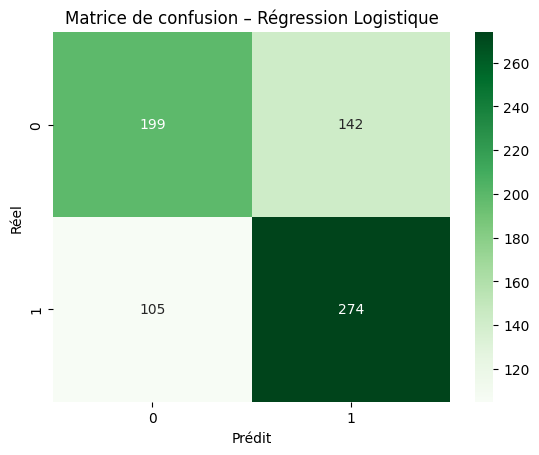

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Rapport de classification – Régression Logistique")
print(classification_report(y_test, y_pred_logreg))

#Matrice de confusion
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Régression Logistique")
plt.show()


Avec une précision de 66%, le modèle permet d’anticiper quels clients vont répondre positivement à une campagne marketing. Il se montre particulièrement performant pour repérer les clients réactifs, c’est-à-dire ceux qui sont susceptibles de répondre à la campagne (Réponse 1). En effet, il atteint un rappel de 72 % sur cette population, ce qui signifie qu’il permet de retrouver près de 3 clients intéressés sur 4. En revanche, le modèle a davantage de difficultés à détecter les clients qui ne répondront pas à la campagne (Réponse 0) avec un taux de rappel de 58%.



ARBRE DE DECISION

 Rapport de classification – Arbre de Décision
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       341
           1       0.63      0.65      0.64       379

    accuracy                           0.62       720
   macro avg       0.62      0.62      0.62       720
weighted avg       0.62      0.62      0.62       720



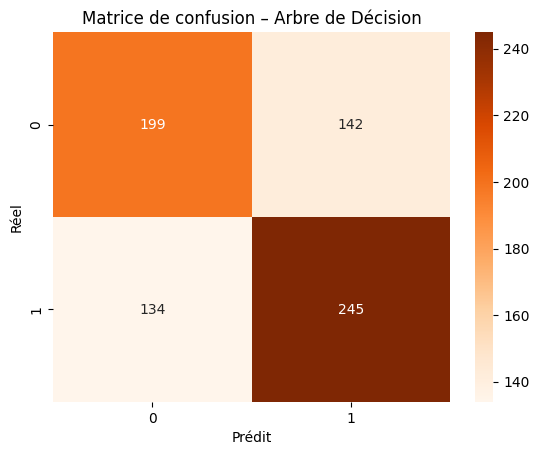

In [ ]:
# 1. Entraînement de l'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 2. Prédiction
y_pred_tree = tree_model.predict(X_test)

# 3. Rapport de classification
print(" Rapport de classification – Arbre de Décision")
print(classification_report(y_test, y_pred_tree))

# 4. Matrice de confusion
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap="Oranges", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Arbre de Décision")
plt.show()


Le modèle  atteint une précision globale de 66 %, donc 2 précisions sur 3 sont correctes.
Pour les clients répondants (1), le modèle affiche un rappel de 72 %, ce qui signifie qu’il arrive à retrouver environ 7 clients réels sur 10 qui auraient effectivement répondu.
Son f1-score sur cette classe est de 0.69, ce qui montre un bon équilibre entre précision et rappel.

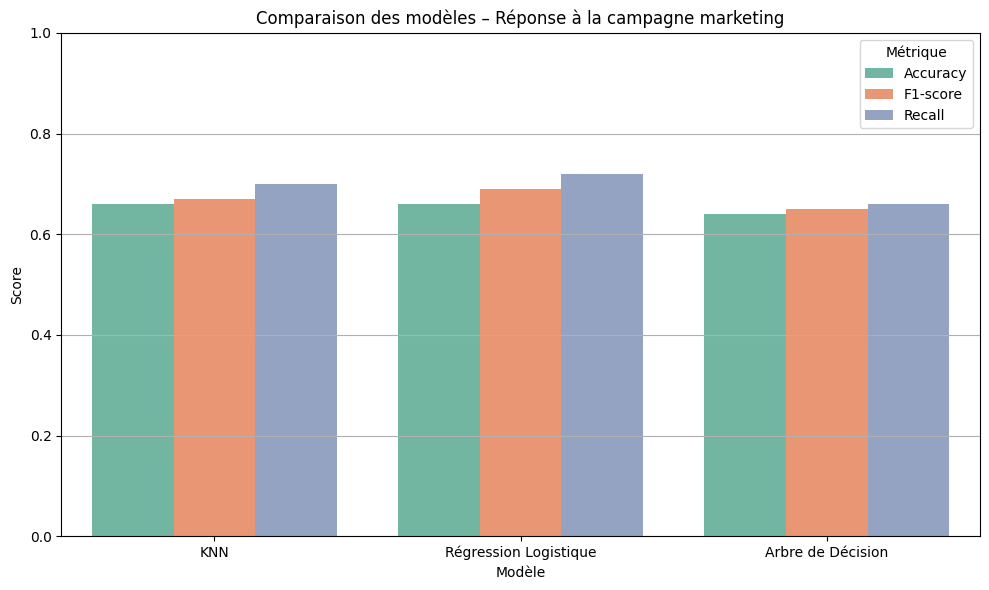

In [ ]:
import matplotlib.pyplot as plt

# Valeurs des métriques des modeles
data = {
    "Modèle": ["KNN", "KNN", "KNN",
               "Régression Logistique", "Régression Logistique", "Régression Logistique",
               "Arbre de Décision", "Arbre de Décision", "Arbre de Décision"],
    "Métrique": ["Accuracy", "F1-score", "Recall",
                 "Accuracy", "F1-score", "Recall",
                 "Accuracy", "F1-score", "Recall"],
    "Score": [0.66, 0.67, 0.70,
              0.66, 0.69, 0.72,
              0.64, 0.65, 0.66]
}

# Création du DataFrame
df_scores = pd.DataFrame(data)

# Affichage avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_scores, x="Modèle", y="Score", hue="Métrique", palette="Set2")
plt.ylim(0, 1)
plt.title("Comparaison des modèles – Réponse à la campagne marketing")
plt.ylabel("Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**Régression Logistique**
C’est le modèle le plus performant sur tous les critères, en particulier sur le recall (≈ 0.72) et le f1-score (≈ 0.69).
Il est donc le plus adapté au ciblage marketing, car il permet de repérer un maximum de clients susceptibles de répondre.

**KNN (k = 49)**
Il suit de près la régression logistique avec un recall à 0.70 et un f1-score à 0.67.
Il est robuste mais plus sensible au bruit et plus coûteux à exécuter.
Bon choix alternatif, mais moins simple à déployer.

**Arbre de Décision**
C’est le moins performant des trois sur l’ensemble des métriques, avec un accuracy à 0.64 et un recall à 0.66.
Il reste intéressant pour son interprétabilité et pour comprendre les règles de décision appliquées par le modèle.

**  ANALYSE ET CONCLUSION DES 3 MODELES**

Trois modèles ont été comparés pour prédire la réponse à une campagne marketing : KNN (k=49), régression logistique et arbre de décision.

**Le modèle de régression logistique** obtient les meilleurs résultats avec :

une précision globale (accuracy) de 66 %, un f1-score de 0.69 et un rappel de 72 % sur les clients ayant répondu à la campagne.

Cela signifie qu’il identifie correctement près de 3 clients sur 4 qui répondent réellement, ce qui en fait le meilleur choix pour maximiser le taux de retour des campagnes.

Le KNN obtient des performances proches (F1 = 0.67, rappel = 70 %) mais est plus lourd à exécuter.
L’arbre de décision est un peu moins performant (F1 = 0.65, rappel = 66 %), mais reste utile pour interpréter les règles de ciblage.

En conclusion le modèle de régression logistique est le plus adapté pour une entreprise qui souhaite identifier rapidement les bons profils à cibler, tout en gardant un modèle simple, efficace et explicable.